# Analyze scraped Twitter data
This file assumes you have already run twitter_scrape_by_twint and twitter_scrape_geo_year to collect and save
all the data for each city in separate directories and csv files.  Garbage collect for memory space.

This file will then read those in, walk through some dataframe data manipulation, and then produce some charts.

In [1]:
# necessary imports
import pandas as pd
import csv
import os
import datetime


In [2]:
# get a list of all csv files in subdirectories

files = []
for dirpath, dirname, filenames in os.walk(".", topdown=False):
   for fname in filenames:
       #print(os.path.join(dirpath, fname))
       current_fullfilename = (os.path.join(dirpath, fname))
       ext = os.path.splitext(current_fullfilename)[-1].lower()
       if ext == ".csv":
           files.append(current_fullfilename)

print(files)

['.\\agadez_geosearch\\2010_geo.csv', '.\\agadez_geosearch\\2011_geo.csv', '.\\agadez_geosearch\\2012_geo.csv', '.\\agadez_geosearch\\2013_geo.csv', '.\\agadez_geosearch\\2014_geo.csv', '.\\agadez_geosearch\\2015_geo.csv', '.\\agadez_geosearch\\2016_geo.csv', '.\\agadez_geosearch\\2017_geo.csv', '.\\agadez_geosearch\\2018_geo.csv', '.\\agadez_geosearch\\2019_geo.csv', '.\\agadez_geosearch\\2020_geo.csv', '.\\dosso_geosearch\\2010_geo.csv', '.\\dosso_geosearch\\2011_geo.csv', '.\\dosso_geosearch\\2012_geo.csv', '.\\dosso_geosearch\\2013_geo.csv', '.\\dosso_geosearch\\2014_geo.csv', '.\\dosso_geosearch\\2015_geo.csv', '.\\dosso_geosearch\\2016_geo.csv', '.\\dosso_geosearch\\2017_geo.csv', '.\\dosso_geosearch\\2018_geo.csv', '.\\dosso_geosearch\\2019_geo.csv', '.\\dosso_geosearch\\2020_geo.csv', '.\\maradi_geosearch\\2010_geo.csv', '.\\maradi_geosearch\\2011_geo.csv', '.\\maradi_geosearch\\2012_geo.csv', '.\\maradi_geosearch\\2013_geo.csv', '.\\maradi_geosearch\\2014_geo.csv', '.\\maradi_

In [3]:
# read them all into one big pandas dataframe
num_tweets_read = 0
num_files_read = 0
tweets = pd.DataFrame()

for f in files:

    temp_df = pd.read_csv(f, \
        dtype={'id':'string','user_id':'string', 'username':'string','language':'string', 'accessed_cityname':'string'}, \
        parse_dates=['date'], \
        usecols=['id', 'date', 'user_id', 'username', 'place', 'language', 'accessed_cityname'])

    print("file {} read {} tweets".format(f, len(temp_df)))

    num_tweets_read += len(temp_df)
    num_files_read += 1

    tweets = tweets.append(temp_df)
    
print("Done. Read {} tweets in {} files".format(num_tweets_read, num_files_read))


file .\agadez_geosearch\2010_geo.csv read 87 tweets
file .\agadez_geosearch\2011_geo.csv read 334 tweets
file .\agadez_geosearch\2012_geo.csv read 509 tweets
file .\agadez_geosearch\2013_geo.csv read 568 tweets
file .\agadez_geosearch\2014_geo.csv read 567 tweets
file .\agadez_geosearch\2015_geo.csv read 544 tweets
file .\agadez_geosearch\2016_geo.csv read 505 tweets
file .\agadez_geosearch\2017_geo.csv read 568 tweets
file .\agadez_geosearch\2018_geo.csv read 529 tweets
file .\agadez_geosearch\2019_geo.csv read 27155 tweets
file .\agadez_geosearch\2020_geo.csv read 48094 tweets
file .\dosso_geosearch\2010_geo.csv read 1980 tweets
file .\dosso_geosearch\2011_geo.csv read 5500 tweets
file .\dosso_geosearch\2012_geo.csv read 6576 tweets
file .\dosso_geosearch\2013_geo.csv read 17142 tweets
file .\dosso_geosearch\2014_geo.csv read 10000 tweets
file .\dosso_geosearch\2015_geo.csv read 5595 tweets
file .\dosso_geosearch\2016_geo.csv read 3670 tweets
file .\dosso_geosearch\2017_geo.csv read 

In [4]:
# now to make life easier let's make some separate columns for later manipulation

# add a column each for the hour number and the day number
tweets['month'] = tweets['date'].dt.month
tweets['year']  = tweets['date'].dt.year

print(tweets.info()) 
print(tweets.columns)
print(tweets.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767100 entries, 0 to 571
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 767100 non-null  string        
 1   date               767100 non-null  datetime64[ns]
 2   place              385307 non-null  object        
 3   language           767100 non-null  string        
 4   user_id            767100 non-null  string        
 5   username           767100 non-null  string        
 6   accessed_cityname  767100 non-null  string        
 7   month              767100 non-null  int64         
 8   year               767100 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1), string(5)
memory usage: 58.5+ MB
None
Index(['id', 'date', 'place', 'language', 'user_id', 'username',
       'accessed_cityname', 'month', 'year'],
      dtype='object')
                  id                date  \
0  20870939805

In [19]:
# custom sort by cities with most recognizable names
# we do this because duplicates will exist between city centers, so we 
# want to err on the side of the more recognizable cityname when dropping duplicates  
# that way niamey, for example, will show more tweets than maradi, even though there's some
# overlap during collection.  This will make better sense to the audience.

tweets['accessed_cityname'] = pd.Categorical(tweets['accessed_cityname'], \
    [ "niamey", "agadez", "tillaberi", "tahoua", "maradi", "dosso", "zinder"])
tweets.sort_values('accessed_cityname', inplace=True)

tweets.drop_duplicates(subset='id', inplace=True) 

# these lines help you debug the data processing one city at a time
#dosso_tw = temp[temp['accessed_cityname']== 'dosso']
#dosso_tw = dosso_tw[dosso_tw['year']==2010]
#niamey_tw =  temp[temp['accessed_cityname']== 'niamey']
#niamey_tw =  niamey_tw[niamey_tw['year']== 2010]
#print(len(temp))
#print( temp[temp['accessed_cityname']== 'dosso'].head()) 
#print( tweets[tweets['accessed_cityname']== 'zinder'].head()) 

# Bar graph the number of tweets
We'll use basic pandas plotting features to graph this out

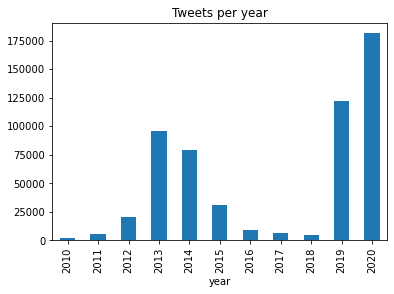

In [20]:
# first we do a groupby and use a count of 
# the tweet 'id' (which should be unique per tweet) as y value

t1 = tweets.groupby([tweets.year])['id'].count()

title_text = "Tweets per year"
ax = t1.plot.bar(title=title_text)

fig = ax.get_figure()
#fig.savefig("tweets_by_localhour_for_" + country_to_plot + ".png")

accessed_cityname  niamey  agadez  tillaberi  tahoua  maradi  dosso  zinder
year                                                                       
2010                 1938      87          2       2       8      0       4
2011                 5134     247         12      57     339     14      12
2012                 6143     175         11     384   12588     23    1334
2013                16074      73         19     251   79320     31     214
2014                 9077      74         48     328   69070     78      82
2015                 5209      87         70     359   25201     91      89
2016                 3572      58         37      50    5653     39      51
2017                 3862      78         20      40    2309     21      37
2018                 3336      67         13      36    1272     24      38
2019                 1971   24516         26      32   95853     43      34
2020                 1993   42269         29     138  136806    115      75


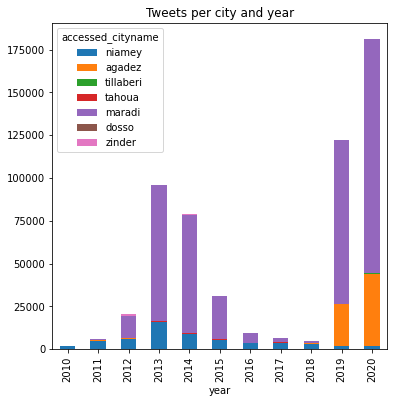

In [31]:
# for the second plot, let's stack the bars and assign colors based on city name
# to do this, we do a double groupby, year and cityname, and again get the value by
# counting the number of tweet 'id's.

t2 =  tweets.groupby(['year', 'accessed_cityname'])['id'].count().unstack().fillna(0)
print(t2.head(11))

title_text = "Tweets per city and year"
ax2 = t2.plot.bar(title=title_text, stacked=True, figsize=(6,6))

fig2 = ax2.get_figure()

accessed_cityname  niamey  agadez  tillaberi  tahoua  maradi  dosso  zinder
year                                                                       
2010                   14       3          2       2       6      0       2
2011                   36      13          4      11      25      5       3
2012                   87      10          6      13     232      7      12
2013                  257      26          9      15     830     17      21
2014                  341      17         18      17     925     31      31
2015                  334      34         35      28     768     29      32
2016                  212      23         20      23     412     23      24
2017                  168      35         15      21     370     15      16
2018                  191      33          9      25     400     22      24
2019                  274    1362         15      26    2137     19      16
2020                  444    1706         18      69    2936     45      54


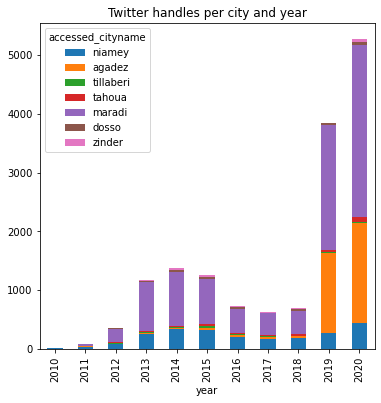

In [32]:
# next, we can do something similar, but instead of using unique tweet ids, we can count
# the number of unique usernames per year and city and stack that plot; this should control for
# the possiblity e.g. of a a few users ramping up their activity while overall twitter usage remains static

t3 =  tweets.groupby(['year', 'accessed_cityname'])['username'].nunique().unstack().fillna(0)
print(t3.head(11))

title_text = "Twitter handles per city and year"
ax3 = t3.plot.bar(title=title_text, stacked=True, figsize=(6,6))

fig3 = ax3.get_figure()

#zinder_tw =  tweets[tweets['accessed_cityname']== 'zinder']
#zinder_tw =  zinder_tw[zinder_tw['year']== 2012]